In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,NaN,85.0,66.0,NaN,NaN,26.6,0.351,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
float64		column 2	38
float64		column 3	57
float64		column 4	57
float64		column 5	114
float64		column 6	114
float64		column 7	57
float64		column 8	152


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,749.000000,730.000000,711.000000,711.000000,654.000000,654.000000,711.000000,616.000000
mean,3.850467,120.853425,69.054852,20.483826,79.848624,31.786239,0.467748,33.011364
std,3.378378,32.179566,19.469834,15.957848,114.414001,7.600687,0.324054,11.458438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,125.000000,36.375000,0.626500,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,52.900000,2.329000,81.000000


<AxesSubplot:>

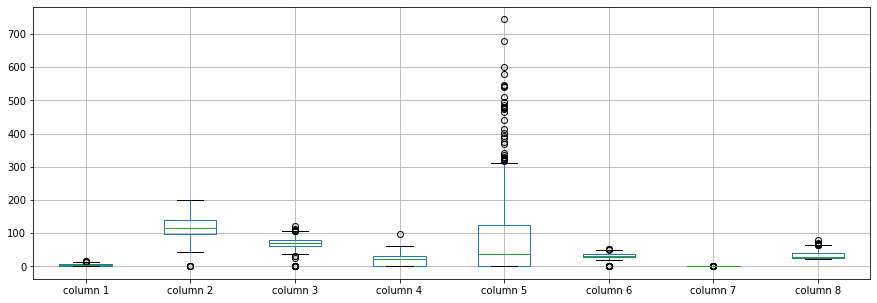

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.850467
column 2    120.853425
column 3     69.054852
column 4     20.483826
column 5     79.848624
column 6     31.786239
column 7      0.467748
column 8     33.011364
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.120508,0.142075,-0.076208,-0.092367,0.000537,-0.041498,0.564207
column 2,0.120508,1.000000,0.141747,0.055106,0.328932,0.180165,0.122043,0.233332
column 3,0.142075,0.141747,1.000000,0.216768,0.084048,0.267164,0.018031,0.253173
column 4,-0.076208,0.055106,0.216768,1.000000,0.424638,0.384209,0.166489,-0.085136
column 5,-0.092367,0.328932,0.084048,0.424638,1.000000,0.204715,0.177833,-0.059097
column 6,0.000537,0.180165,0.267164,0.384209,0.204715,1.000000,0.081015,0.033441
column 7,-0.041498,0.122043,0.018031,0.166489,0.177833,0.081015,1.000000,0.024567
column 8,0.564207,0.233332,0.253173,-0.085136,-0.059097,0.033441,0.024567,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+56,8+56+56,8+56+56+56,8+56+56+56+56,8+56+56+56+56+56,8+56+56+56+56,8+56+56+56,8+56+56,8+56,8], vae_layer = False, seed = 56)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 383.05641810099286
Epoch: 1 , loss: 381.1377919514974
Epoch: 2 , loss: 380.1233145395915
Epoch: 3 , loss: 378.2682189941406
Epoch: 4 , loss: 372.57492955525714
Epoch: 5 , loss: 366.06128629048663
Epoch: 6 , loss: 361.6288375854492
Epoch: 7 , loss: 358.3100306193034
Epoch: 8 , loss: 359.5024878184001
Epoch: 9 , loss: 353.9632816314697
Epoch: 10 , loss: 353.9896774291992
Epoch: 11 , loss: 350.90989112854004
Epoch: 12 , loss: 347.26280403137207
Epoch: 13 , loss: 347.7095254262288
Epoch: 14 , loss: 345.9259599049886
Epoch: 15 , loss: 341.11032740275067
Epoch: 16 , loss: 338.0178915659587
Epoch: 17 , loss: 332.8079710006714
Epoch: 18 , loss: 332.52282428741455
Epoch: 19 , loss: 327.4456256230672
Epoch: 20 , loss: 324.00814660390216
Epoch: 21 , loss: 319.5762758255005
Epoch: 22 , loss: 316.4173231124878
Epoch: 23 , loss: 321.58305168151855
Epoch: 24 , loss: 310.1438798904419
Epoch: 25 , loss: 304.160339037577

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,1.68299,0.0,0.0,-15.871552,38.676056,0.0,0.0,-11.790659
2,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
764,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
765,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
766,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1666.1424577927178, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.2884307911848965

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.00000,148.0,72.0,35.000000,0.000000,33.6,0.627,50.000000
1,2.68299,85.0,66.0,13.128448,38.676056,26.6,0.351,19.209341
2,8.00000,183.0,64.0,0.000000,0.000000,23.3,0.672,32.000000
3,1.00000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.000000
4,0.00000,137.0,40.0,35.000000,168.000000,43.1,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.00000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.000000
764,2.00000,122.0,70.0,27.000000,0.000000,36.8,0.340,27.000000
765,5.00000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.000000
766,1.00000,126.0,60.0,0.000000,0.000000,30.1,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AN_10.xlsx", index=False, header=False)